Name: Holly Kular\
Date: 05-01-2024\
Email: hkular@ucsd.edu\
decode_graph.ipynb\
Description: making graphs

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from scipy.io import loadmat

In [104]:
# graphs

# what do I want to look at?
# ==========================================================================================================
model = 0

RNN_params1 = {}
RNN_params1['prob_split'] = '70_30'
RNN_params1['afc'] = 6
RNN_params1['coh'] = 'lo'
RNN_params1['feedback'] = False
RNN_params1['thresh'] = [.3,.7]

# Decoding params
D_params1 = {}
D_params1['time_avg'] = False
D_params1['t_win'] = [200,-1]
D_params1['label'] = 'stim' # 'stim' or 'choice'
D_params1['units'] = 'exc' # 'all' or 'exc' or 'inh'
D_params1['pred'] = 'expected' # 'expected' or 'unexpected', trials had stim 0 or 1 dominant


RNN_params2 = {}
RNN_params2['prob_split'] = '70_30'
RNN_params2['afc'] = 6
RNN_params2['coh'] = 'lo'
RNN_params2['feedback'] = False
RNN_params2['thresh'] = [.3,.7]

# Decoding params
D_params2 = {}
D_params2['time_avg'] = False
D_params2['t_win'] = [200,-1]
D_params2['label'] = 'stim' # 'stim' or 'choice'
D_params2['units'] = 'inh' # 'all' or 'exc' or 'inh'
D_params2['pred'] = 'expected' # 'expected' or 'unexpected', trials had stim 0 or 1 dominant

# Timing of task
task_info = {}
task_info['trials'] = 1000
task_info['trial_dur'] = 250  # trial duration (timesteps)
task_info['stim_on'] = 80
task_info['stim_dur'] = 50

# ==========================================================================================================

# Load data
if sys.platform.startswith('linux'):
    data_dir1 = f"/mnt/neurocube/local/serenceslab/holly/RNN_Geo/data/rdk_{RNN_params1['prob_split']}_{RNN_params1['afc']}afc/feedforward_only/{RNN_params1['coh']}_coh"
else:
    data_dir1 = f"/Volumes/serenceslab/holly/RNN_Geo/data/rdk_{RNN_params1['prob_split']}_{RNN_params1['afc']}afc/feedforward_only/{RNN_params1['coh']}_coh"
mat_files1 = [f for f in os.listdir(data_dir1) if f.endswith('.mat')]# Get all the trained models (should be 40 .mat files)
model_path1 = os.path.join(data_dir1, mat_files1[model]) 
model1 = loadmat(model_path1) # model.keys()

# Change this if we want a different number of trials and different default stim (0 is the one RNN was trained on)
if D_params1['pred'] == 'expected':
    data_file = f"{data_dir1}/Trials{task_info['trials']}_model{model_path1[-7:-4]}_0expected.npz"
elif D_params1['pred'] == 'unexpected':
    data_file = f"{data_dir1}/Trials{task_info['trials']}_model{model_path1[-7:-4]}_1expected.npz"

if sys.platform.startswith('linux'):
    data_dir2 = f"/mnt/neurocube/local/serenceslab/holly/RNN_Geo/data/rdk_{RNN_params2['prob_split']}_{RNN_params2['afc']}afc/feedforward_only/{RNN_params2['coh']}_coh"
else:
    data_dir2 = f"/Volumes/serenceslab/holly/RNN_Geo/data/rdk_{RNN_params2['prob_split']}_{RNN_params2['afc']}afc/feedforward_only/{RNN_params2['coh']}_coh"

mat_files2 = [f for f in os.listdir(data_dir2) if f.endswith('.mat')]# Get all the trained models (should be 40 .mat files)
model_path2 = os.path.join(data_dir2, mat_files2[model]) 
model2 = loadmat(model_path2) # model.keys()

# Change this if we want a different number of trials and different default stim (0 is the one RNN was trained on)
if D_params2['pred'] == 'expected':
    data_file = f"{data_dir2}/Trials{task_info['trials']}_model{model_path2[-7:-4]}_0expected.npz"
elif D_params2['pred'] == 'unexpected':
    data_file = f"{data_dir2}/Trials{task_info['trials']}_model{model_path2[-7:-4]}_1expected.npz"

# =================
# load npzs
full_file1 = os.path.join(data_dir1, f"decode_T{task_info['trials']}_model{model_path1[-7:-4]}_{D_params1['label']}_{D_params1['pred']}_{D_params1['units']}.npz")
full_file2 = os.path.join(data_dir2, f"decode_T{task_info['trials']}_model{model_path2[-7:-4]}_{D_params2['label']}_{D_params2['pred']}_{D_params2['units']}.npz")

acc1 = np.load(full_file1)
acc2 = np.load(full_file2)


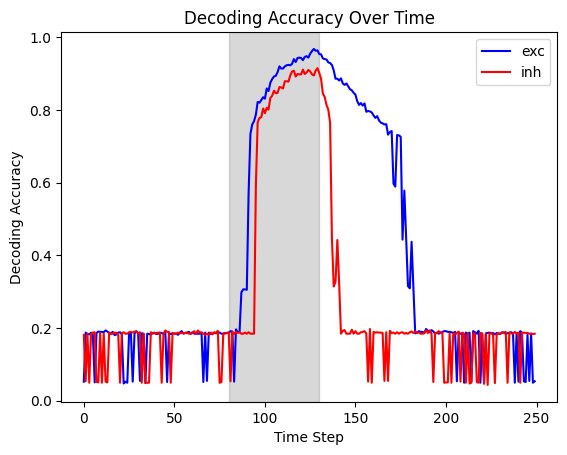

In [105]:
save_plt = True
# display on one graph
plt.figure()

plt.plot(range(task_info['trial_dur']), acc1['decoding_acc'], label='exc', color='blue')
plt.plot(range(task_info['trial_dur']), acc2['decoding_acc'], label='inh', color='red')

plt.xlabel('Time Step')
plt.ylabel('Decoding Accuracy')
plt.title('Decoding Accuracy Over Time')
plt.legend()  # Add legend to identify lines

plt.axvspan(task_info['stim_on'], task_info['stim_on']+task_info['stim_dur'], color = 'gray', alpha = 0.3)

if save_plt:
  plt.savefig(f"{data_dir1}/decode_T{task_info['trials']}_model{model_path1[-7:-4]}_{D_params1['label']}_{D_params1['pred']}_{D_params1['units']}.png")

plt.show()




In [74]:
# clear vars for next time
del model_path1, model_path2, acc1, acc2, data_dir1, data_dir2 


In [ ]:
# fit logistic function
def logistic_func(x, a, b, c, d):
    return a / (1 + np.exp(-c * (x - d))) + b

popt, _ = curve_fit(logistic_func, range(0, task_info['trial_dur']), acc[0:])

# 'popt' will contain the fitted parameters (a, b, c) of the log function

# Optional: Estimate the y-value of the asymptote (assuming based on parameter b)
asymptote_y = popt[1]
print("Estimated y-value of the asymptote:", asymptote_y)

# Optional: Visualization
plt.plot(range(0, task_info['trial_dur']), acc[0:], label='Data')
plt.plot(range(0, task_info['trial_dur']), logistic_func(range(0, task_info['trial_dur']), *popt), label=f'y asymptote of logistic {round(asymptote_y, 3)}')
plt.axvspan(task_info['stim_on'], task_info['stim_on']+task_info['stim_dur'], color = 'gray', alpha = 0.3)
plt.xlabel('Time Step')
plt.ylabel('Decoding Accuracy')
plt.title('Decoding Accuracy Over Time (Logistic Fit)')
plt.legend()
if save_plt:
    plt.savefig(f"{data_dir}/decode_T{task_info['trials']}_{D_params['label']}_{D_params['pred']}fit.png")
plt.show()